In [1]:
import pandas as pd


In [3]:
hr_df = pd.read_csv('/Users/raghavverma/Desktop/hr_data.csv')


In [5]:
hr_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [6]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [7]:
# checking descriptive statistics
hr_df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [57]:
# Summary of data
print('Rows' ,hr_df.shape[0])
print('Columns' ,hr_df.shape[1])
print('\nFeatures\n' ,hr_df.columns.tolist())
print('\nMissing Values' ,hr_df.isnull().sum().values.sum())
print('\nUnique Values\n',hr_df.nunique())





Rows 14999
Columns 9

Features
 ['employee_id', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'department', 'salary']

Missing Values 0

Unique Values
 employee_id              14999
number_project               6
average_montly_hours       215
time_spend_company           8
Work_accident                2
left                         2
promotion_last_5years        2
department                  10
salary                       3
dtype: int64


In [25]:
# check for null values
hr_df.shape[0]

14999

In [10]:
# View which columns are categorical
hr_df.select_dtypes(exclude=['int', 'float']).columns

Index(['department', 'salary'], dtype='object')

In [11]:
# Display values in categorical columns
print(hr_df['department'].unique())
print(hr_df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [20]:
hr_df.shape

(14999, 9)

# Loading our Evaluation and Employee Satisfaction Data

In [58]:
emp_satis_eval = pd.read_excel('/Users/raghavverma/Downloads/employee_satisfaction_evaluation.xlsx')


In [72]:
emp_satis_eval.columns=['employee_id', 'satisfaction_level', 'last_evaluation']

In [73]:
emp_satis_eval.head()

,employee_id,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


# Merge Tables

In [75]:
inner_join=hr_df.merge(emp_satis_eval,how='inner',on='employee_id')

In [78]:
inner_join.shape

(14999, 11)

In [79]:
#checking missin values
inner_join.isnull().sum()

employee_id            0
satisfaction_level    27
last_evaluation       27
dtype: int64

In [86]:
# Filling missing values with mean
inner_join.fillna(inner_join.mean(), inplace=True)
inner_join.isnull().sum()

/var/folders/qv/1rsxdp9x3fnft8qjltp6b0940000gn/T/ipykernel_7431/1892027785.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inner_join.fillna(inner_join.mean(), inplace=True)


employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
satisfaction_level       0
last_evaluation          0
dtype: int64

In [87]:
inner_join.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [89]:
# dropping employee id
main_df_final=inner_join.drop(columns='employee_id')
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [90]:
main_df_final.groupby('department').sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [91]:
main_df_final.groupby('department').mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [92]:
main_df_final['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [93]:
main_df_final['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
# function to plot corr heatmap
def plot_corr(df):
    ax=plt.subplots(figsize=(8,8))
    sns.heatmap(df.corr(),cmap='rainbow',annot=True)


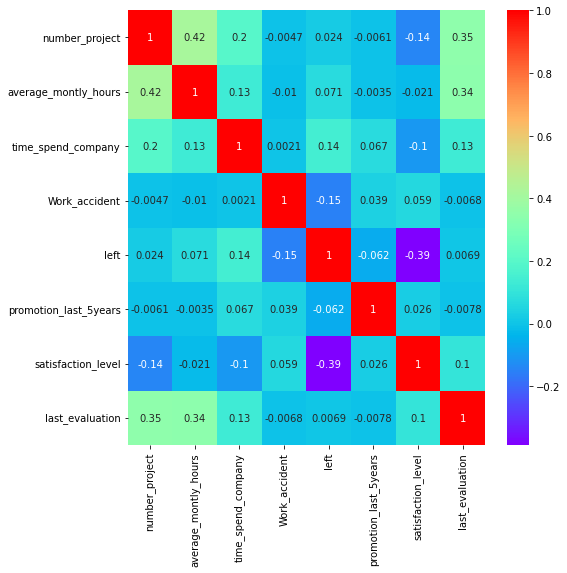

In [117]:
plot_corr(main_df_final)

#  Preparing out  Dataset for ML

In [118]:
# Perform One Hot Encoding on Categorical Data

categorical = ['department','salary']
main_df_final = pd.get_dummies(main_df_final, columns=categorical, drop_first=True)
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [119]:
# How many columns do we now have?

len(main_df_final.columns)

19

In [120]:
# How many employees in the dataset have left?

len(main_df_final.loc[main_df_final['left'] == 1])

3571

In [121]:
main_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_project          14999 non-null  int64  
 1   average_montly_hours    14999 non-null  int64  
 2   time_spend_company      14999 non-null  int64  
 3   Work_accident           14999 non-null  int64  
 4   left                    14999 non-null  int64  
 5   promotion_last_5years   14999 non-null  int64  
 6   satisfaction_level      14999 non-null  float64
 7   last_evaluation         14999 non-null  float64
 8   department_RandD        14999 non-null  uint8  
 9   department_accounting   14999 non-null  uint8  
 10  department_hr           14999 non-null  uint8  
 11  department_management   14999 non-null  uint8  
 12  department_marketing    14999 non-null  uint8  
 13  department_product_mng  14999 non-null  uint8  
 14  department_sales        14999 non-null

In [122]:
from sklearn.model_selection import train_test_split

# We remove the label values from our training data
X = main_df_final.drop(['left'],axis=1).values

# We assigned those label values to our Y dataset
y = main_df_final['left'].values


In [123]:
# Split it to a 70:30 Ratio Train:Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [124]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [125]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.651968,-0.964011,-1.023763,-0.410966,-0.145616,0.511870,-0.680319,-0.235797,-0.228506,-0.229427,-0.206653,-0.245106,-0.251804,-0.615702,-0.420264,2.101106,1.023809,-0.870484
1,0.971418,0.401839,1.715055,-0.410966,-0.145616,1.037372,0.781866,-0.235797,-0.228506,-0.229427,-0.206653,-0.245106,-0.251804,-0.615702,2.379454,-0.475940,-0.976744,1.148786
2,-0.651968,-0.461860,1.030350,-0.410966,-0.145616,-1.953948,-0.680319,-0.235797,-0.228506,-0.229427,-0.206653,-0.245106,-0.251804,-0.615702,2.379454,-0.475940,1.023809,-0.870484
3,-0.651968,1.707432,1.715055,-0.410966,-0.145616,0.431023,-1.031243,-0.235797,-0.228506,-0.229427,-0.206653,-0.245106,3.971343,-0.615702,-0.420264,-0.475940,-0.976744,1.148786
4,0.971418,-1.044355,-0.339059,-0.410966,-0.145616,0.026791,1.191277,-0.235797,-0.228506,-0.229427,-0.206653,-0.245106,-0.251804,-0.615702,-0.420264,-0.475940,1.023809,-0.870484


#  Let's Train a Logistic Regression Model

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 78.00%
[[3151  241]
 [ 749  359]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      3392
           1       0.60      0.32      0.42      1108

    accuracy                           0.78      4500
   macro avg       0.70      0.63      0.64      4500
weighted avg       0.76      0.78      0.75      4500



# Let's Try a Random Forest Classifer

In [130]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 98.62%
[[3386    6]
 [  56 1052]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3392
           1       0.99      0.95      0.97      1108

    accuracy                           0.99      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [133]:
main_df_final.drop(['left'],axis=1).columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [135]:
pd.DataFrame(X_train).columns

RangeIndex(start=0, stop=18, step=1)

In [132]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = pd.DataFrame(X_train).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
5,0.325995
2,0.186526
0,0.176545
1,0.152367
6,0.118848
3,0.008485
16,0.006902
17,0.003566
15,0.003379
14,0.003161


In [141]:
new_xtrain=pd.DataFrame(X_train)
new_xtrain.columns=['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium']

In [144]:
updated_feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = new_xtrain.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

updated_feature_importances

,importance
satisfaction_level,0.325995
time_spend_company,0.186526
number_project,0.176545
average_montly_hours,0.152367
last_evaluation,0.118848
Work_accident,0.008485
salary_low,0.006902
salary_medium,0.003566
department_technical,0.003379
department_support,0.003161
